### E16. (10 points) Topography data
The file RoedeserBerg_large.pts.gz contains (x,y,z) topography data of a location near Kassel, Germany.
Solve the whole exercise without using loops.
- Read the data contained in the above file into memory.
- Select the subset of points whose horizontal distance from the position p0 = (513196.5, 5689695.0) is less than radius r = 5 km.
- Store the selected data into a new file RoedeserBerg.pts.gz in the same format as the original file. How many points are stored in the file?
- Visualize the selected topography data using matplotlib or a sub-package. Additionally store the resulting graphic into a png file RoedeserBerg.png

Number of points stored in the file: 645568


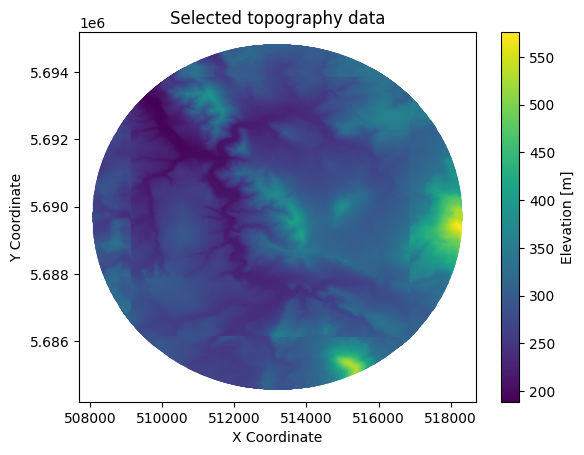

In [1]:
import numpy as np
import matplotlib.pyplot as plt

topo_fname = "RoedeserBerg_large.pts.gz"
topo_data = np.genfromtxt(topo_fname, delimiter = ' ')
#topo_data = np.loadtxt(topo_fname)

p0 = np.array([513196.5, 5689695.0])
radius = 5000  

# Compute the horizontal distance from p0
distances = np.sqrt(np.sum((topo_data[:, :2] - p0) ** 2, axis=1)) # all rows and first 2 columns, axis=1 means summation in row-wise
selected_data = topo_data[distances < radius]

selected_fname = 'RoedeserBerg.pts.gz'
np.savetxt(selected_fname, selected_data)

num_points = selected_data.shape[0] # number of rows; if [1] then number of columns and .shape, the whole dimension
print(f'Number of points stored in the file: {num_points}')

# Plot 
plt.scatter(selected_data[:, 0], selected_data[:, 1], c=selected_data[:, 2]) # x,y and c= marker colors(elevation)
plt.colorbar(label='Elevation [m]')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Selected topography data')


plt.savefig('RoedeserBerg.png', dpi=300)
plt.show()